In [14]:
import numpy as np
import pandas as pd
import re
import string

from google.colab import files

# Upload the zip file
#uploaded = files.upload()



In [15]:
# import zipfile
# import os

# # Assuming the zip file is named 'uploaded_file.zip'
# zip_filename = next(iter(uploaded))  # Get the uploaded zip file name

# # Create a directory to extract the files
# extract_dir = '/content/extracted_files'
# os.makedirs(extract_dir, exist_ok=True)

# # Extract the contents of the zip file
# with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
#     zip_ref.extractall(extract_dir)

# # List the extracted files
# extracted_files = os.listdir(extract_dir)
# print("Extracted Files:", extracted_files)


In [16]:
# # Load the extracted CSV files into Pandas DataFrames
# file1_path = os.path.join(extract_dir, 'train.csv')
# file2_path = os.path.join(extract_dir, 'test.csv')

# df1 = pd.read_csv(file1_path) #putting dataframe in variable
# df2 = pd.read_csv(file2_path)

# # Display the first few rows of the DataFrames
# print(df1.head())
# print(df2.head())


In [17]:
# #merging multiple csv files into one csv file
# from glob import glob

# # Define the output filename
# filename = 'dataset_news.csv'

# # Open the output file in append mode
# with open(filename, 'a') as singleFile:
#     first_csv = True

#     # Adjust the path for Colab environment or specify your path directly
#     # Assuming the CSVs are in a directory named 'extracted_files'
#     for csv in glob('/content/extracted_files/*.csv'):  # Adjust the path if necessary
#         if csv == filename:
#             pass
#         else:
#             header = True
#             with open(csv, 'r') as infile:
#                 for line in infile:
#                     if first_csv and header:
#                         singleFile.write(line)  # Write header of the first file
#                         first_csv = False
#                         header = False
#                     elif header:
#                         header = False  # Skip header for subsequent files
#                     else:
#                         singleFile.write(line)  # Write the rest of the lines


In [18]:
data = pd.read_csv("/content/dataset_news.csv")
data.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


# EDA

In [19]:
data.shape

(127600, 3)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127600 entries, 0 to 127599
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Class Index  127600 non-null  int64 
 1   Title        127600 non-null  object
 2   Description  127600 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.9+ MB


In [21]:
data['Class Index'].value_counts()

,count
Class Index,
3,31900
4,31900
2,31900
1,31900


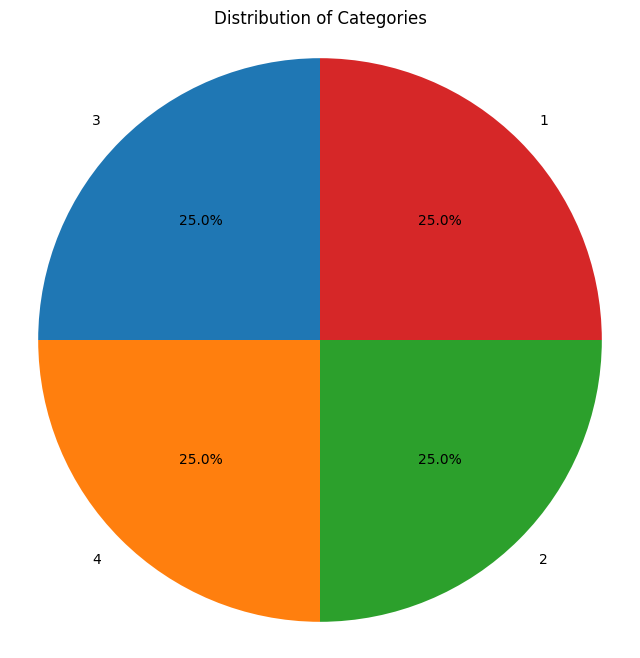

In [22]:
import matplotlib.pyplot as plt

# Calculate the value counts for each category
category_counts = data['Class Index'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


## Data preperation

In [23]:
data['news'] = data['Title'] + ' ' + data['Description']

# rename columns
data = data.rename(columns = {'Class Index': 'category'}, inplace = False)
data.head()

,category,Title,Description,news
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Wall St. Bears Claw Back Into the Black (Reute...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Carlyle Looks Toward Commercial Aerospace (Reu...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Iraq Halts Oil Exports from Main Southern Pipe...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","Oil prices soar to all-time record, posing new..."


In [24]:
# delete columns (unused column)
data = data.drop(data.columns[[1, 2]], axis=1)
data.head()

,category,news
0,3,Wall St. Bears Claw Back Into the Black (Reute...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...
4,3,"Oil prices soar to all-time record, posing new..."


In [25]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # define labels
# labels = ['World News', 'Sports News', 'Business News', 'Sci/Tech News']

# ax = sns.countplot(data.category)
# plt.xlabel('category news')
# ax.set_xticklabels(labels);

In [26]:
# removing punctuation down character
def removePunctuationDown(strs):
    remove = '!#$%&\()+,-./:;<=>?@[\\]_{|}~'
    pattern = r"[{}]".format(remove)
    h = re.sub(pattern, " ", strs)
    return h

# removing punctuation up character
def removePunctuationUp(strs):
    remove = ',"\^`*'
    # remove = ',"\'^`*'
    pattern = r"[{}]".format(remove)
    h = re.sub(pattern, "", strs)
    return h

# replace other special character
def replace(strs):
    strs = strs.replace('\\t',' ').replace('\\n',' ').replace('\\u',' ').replace('\\',' ')
    strs = strs.replace('\n',' ')
    strs = strs.replace('\t','')
    strs = strs.encode('utf-8').decode('ascii', 'ignore') #non-asci are ignored
    return strs
# remove emoji
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002500-\U00002BEF"  # chinese char
                           u"\U00002702-\U000027B0"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           u"\u2640-\u2642"
                           u"\u2600-\u2B55"
                           u"\u200d"
                           u"\u23cf"
                           u"\u23e9"
                           u"\u231a"
                           u"\ufe0f"  # dingbats
                           u"\u3030"
                               #convert data input to Unicode
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [27]:
# Apply Cleaning Data
data['news'] = [i.lower() for i in data.news] #lower case
data['remove_emoji'] = data['news'].apply(remove_emoji) #remov emoji
data['hastags'] = [re.findall(r'\B#\w*[a-zA-Z0-9]+\w*', i) for i in data.remove_emoji] #save hastags
data['remove_email'] = [re.sub(r'\S*@\S*\s?','',i) for i in data.remove_emoji] #remove email
data['remove_hashtag'] = [re.sub("#[A-Za-z0-9_]+",'',i) for i in data.remove_emoji] #remove hastags
data['remove_special_character'] = data['remove_hashtag'].replace(r'http\s+|www.\s+','',regex=True).replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True) #remove link
data['remove_special_character'] = [re.sub(r'&lt;/?[a-z]+&gt;','',i) for i in data.remove_special_character] #Removing Special HTML-like Tags
data['remove_special_character'] = [re.sub('<.*?>+', '', i) for i in data.remove_special_character] #remove special character
data['text_clean'] = [removePunctuationDown(i) for i in data.remove_special_character] #remove punc down
data['text_clean'] = [removePunctuationUp(i) for i in data.text_clean] #remove punc up
data['text_clean'] = [replace(j) for j in data.text_clean] #. Replacing Newline, Tab, and Other Special Characters

In [28]:
data.tail()

,category,news,remove_emoji,hastags,remove_email,remove_hashtag,remove_special_character,text_clean
127595,1,around the world ukrainian presidential candid...,around the world ukrainian presidential candid...,[],around the world ukrainian presidential candid...,around the world ukrainian presidential candid...,around the world ukrainian presidential candid...,around the world ukrainian presidential candid...
127596,2,void is filled with clement with the supply of...,void is filled with clement with the supply of...,[],void is filled with clement with the supply of...,void is filled with clement with the supply of...,void is filled with clement with the supply of...,void is filled with clement with the supply of...
127597,2,martinez leaves bitter like roger clemens did ...,martinez leaves bitter like roger clemens did ...,[],martinez leaves bitter like roger clemens did ...,martinez leaves bitter like roger clemens did ...,martinez leaves bitter like roger clemens did ...,martinez leaves bitter like roger clemens did ...
127598,3,5 of arthritis patients in singapore take bext...,5 of arthritis patients in singapore take bext...,[],5 of arthritis patients in singapore take bext...,5 of arthritis patients in singapore take bext...,5 of arthritis patients in singapore take bext...,5 of arthritis patients in singapore take bext...
127599,3,ebay gets into rentals ebay plans to buy the a...,ebay gets into rentals ebay plans to buy the a...,[],ebay gets into rentals ebay plans to buy the a...,ebay gets into rentals ebay plans to buy the a...,ebay gets into rentals ebay plans to buy the a...,ebay gets into rentals ebay plans to buy the a...


## Custom Cleansing Data

In [29]:
def text_clean(text):
    ## Decontract text
    # specific
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"won\’t", "will not", text)
    text = re.sub(r"can\’t", "can not", text)
    text = re.sub(r"\'t've", " not have", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'clock", "f the clock", text)
    text = re.sub(r"\'cause", " because", text)

    # general
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"n\’t", " not", text)
    text = re.sub(r"\’re", " are", text)
    text = re.sub(r"\’s", " is", text)
    text = re.sub(r"\’ll", " will", text)
    text = re.sub(r"\’t", " not", text)
    text = re.sub(r"\’ve", " have", text)
    text = re.sub(r"\’m", " am", text)
    text = re.sub(r"\’", "\'", text)
    # remove all puctuation
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text) #remove digit/number

    # remove all special characters
    text = re.sub(r'\W', ' ', text)

    # remove break
    text = re.sub('[‘’“”…]', '', text)

    # remove prefixed 'b'
    text = re.sub(r'^b\s+', '', text)

    # substituting multiple spaces with single space
    text = re.sub(r'\s+', ' ', text, flags=re.I)

    return text

data['text_clean'] = data['text_clean'].apply(lambda x: text_clean(x))

In [30]:
data.head()

,category,news,remove_emoji,hastags,remove_email,remove_hashtag,remove_special_character,text_clean
0,3,wall st. bears claw back into the black (reute...,wall st. bears claw back into the black (reute...,[],wall st. bears claw back into the black (reute...,wall st. bears claw back into the black (reute...,wall st. bears claw back into the black (reute...,wall st bears claw back into the black reuters...
1,3,carlyle looks toward commercial aerospace (reu...,carlyle looks toward commercial aerospace (reu...,[],carlyle looks toward commercial aerospace (reu...,carlyle looks toward commercial aerospace (reu...,carlyle looks toward commercial aerospace (reu...,carlyle looks toward commercial aerospace reut...
2,3,oil and economy cloud stocks' outlook (reuters...,oil and economy cloud stocks' outlook (reuters...,[],oil and economy cloud stocks' outlook (reuters...,oil and economy cloud stocks' outlook (reuters...,oil and economy cloud stocks' outlook (reuters...,oil and economy cloud stocks outlook reuters r...
3,3,iraq halts oil exports from main southern pipe...,iraq halts oil exports from main southern pipe...,[],iraq halts oil exports from main southern pipe...,iraq halts oil exports from main southern pipe...,iraq halts oil exports from main southern pipe...,iraq halts oil exports from main southern pipe...
4,3,"oil prices soar to all-time record, posing new...","oil prices soar to all-time record, posing new...",[],"oil prices soar to all-time record, posing new...","oil prices soar to all-time record, posing new...","oil prices soar to all-time record, posing new...",oil prices soar to all time record posing new ...


# Data Preprocessing

In [31]:
data = data[['news', 'text_clean', 'category']]
data.head()

,news,text_clean,category
0,wall st. bears claw back into the black (reute...,wall st bears claw back into the black reuters...,3
1,carlyle looks toward commercial aerospace (reu...,carlyle looks toward commercial aerospace reut...,3
2,oil and economy cloud stocks' outlook (reuters...,oil and economy cloud stocks outlook reuters r...,3
3,iraq halts oil exports from main southern pipe...,iraq halts oil exports from main southern pipe...,3
4,"oil prices soar to all-time record, posing new...",oil prices soar to all time record posing new ...,3


## Lemmatization

In [32]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [33]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = nltk.stem.WordNetLemmatizer()
wordnet_lemmatizer = WordNetLemmatizer()

# define tag and lemmatization function
#Defining a Function to Map NLTK Tags to WordNet Tags
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None
def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)
# lemmatizing
data['text_lemma'] = data['text_clean'].apply(lambda x: lemmatize_sentence(x))

data = data[['text_clean','text_lemma','category']]
data.head()

,text_clean,text_lemma,category
0,wall st bears claw back into the black reuters...,wall st bear claw back into the black reuters ...,3
1,carlyle looks toward commercial aerospace reut...,carlyle look toward commercial aerospace reute...,3
2,oil and economy cloud stocks outlook reuters r...,oil and economy cloud stock outlook reuters re...,3
3,iraq halts oil exports from main southern pipe...,iraq halt oil export from main southern pipeli...,3
4,oil prices soar to all time record posing new ...,oil price soar to all time record pose new men...,3


## stop word

In [34]:
stop = stopwords.words('english')

data['text_preprocess'] = data['text_lemma'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data.head()
# text_preprocess lemmatization + stop word removal

,text_clean,text_lemma,category,text_preprocess
0,wall st bears claw back into the black reuters...,wall st bear claw back into the black reuters ...,3,wall st bear claw back black reuters reuters s...
1,carlyle looks toward commercial aerospace reut...,carlyle look toward commercial aerospace reute...,3,carlyle look toward commercial aerospace reute...
2,oil and economy cloud stocks outlook reuters r...,oil and economy cloud stock outlook reuters re...,3,oil economy cloud stock outlook reuters reuter...
3,iraq halts oil exports from main southern pipe...,iraq halt oil export from main southern pipeli...,3,iraq halt oil export main southern pipeline re...
4,oil prices soar to all time record posing new ...,oil price soar to all time record pose new men...,3,oil price soar time record pose new menace us ...


In [35]:
#convert dataframe to values
#Converting the 'text_preprocess' Column to a Numpy Array aka converting pandas to numpy array
data_process = data['text_preprocess'].values
label = data['category'].apply(lambda x:x-1).values  # shift all cateogry labels to -1 to start from zero as many mahcine learning models start from zero not 1

In [36]:
data_process[0:10]

array(['wall st bear claw back black reuters reuters short seller wall street dwindle band ultra cynic see green',
       'carlyle look toward commercial aerospace reuters reuters private investment firm carlyle group reputation make well time occasionally controversial play defense industry quietly place bet another part market',
       'oil economy cloud stock outlook reuters reuters soar crude price plus worry economy outlook earnings expect hang stock market next week depth summer doldrums',
       'iraq halt oil export main southern pipeline reuters reuters authority halt oil export flow main pipeline southern iraq intelligence show rebel militia could strike infrastructure oil official say saturday',
       'oil price soar time record pose new menace us economy afp afp tearaway world oil price toppling record strain wallet present new economic menace barely three month us presidential election',
       'stock end near year low reuters reuters stock end slightly high friday stay n

In [37]:
label #after minused 1

array([2, 2, 2, ..., 1, 2, 2])

Data Splitting

In [38]:
from sklearn.model_selection import train_test_split

text_train, text_test, label_train, label_test = train_test_split(data_process, label, test_size=0.2, shuffle=True,  stratify=label, random_state=42)

text_train.shape, text_test.shape, label_train.shape, label_test.shape

((102080,), (25520,), (102080,), (25520,))

# Modeling

In [39]:
# tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences #A function used to ensure that all input sequences have the same length, by padding shorter sequences with zeros or truncating longer sequences.

tokenizer = Tokenizer(num_words=10000, oov_token='x') #take most frequent 10,000 and ignore other X
tokenizer.fit_on_texts(text_train) #mapping each word to its integer number in index
tokenizer.fit_on_texts(text_test)

word_index = tokenizer.word_index
total_words = len(word_index)+1 #store total number of vocab which will be used as input to ml models

sekuens_train = tokenizer.texts_to_sequences(text_train) #Converting Text to Sequences
sekuens_test = tokenizer.texts_to_sequences(text_test)
#The text is converted into sequences of integers, where each word is represented by its corresponding index in word index

padded_train = pad_sequences(sekuens_train, maxlen=100) #
padded_test = pad_sequences(sekuens_test, maxlen=100)

In [40]:
print(f'train datashape : {padded_train.shape}') #word in word index
print(f'test datashape : {padded_test.shape}')
total_words

train datashape : (102080, 100)
test datashape : (25520, 100)


54643

In [41]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [42]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=total_words,output_dim=128,input_length=100), #each word will be represented by 128 vector
    #The Embedding layer translates the integer word indices into dense vector representations, allowing the model to learn word relationships.
    tf.keras.layers.LSTM(128),
    #128: This is the number of LSTM units (or memory cells). The higher the number,
    #the more complex relationships the model can capture, but it also increases the computational cost.
    tf.keras.layers.Dense(128, activation='relu'),
    #Dense Layer: This is a fully connected layer where each input node is connected to every output node. 128 neurons in this layer
    #: ReLU (Rectified Linear Unit) is a common activation function that helps introduce non-linearity to the model and mitigates the vanishing gradient problem.
    #ReLU turns all negative values to 0 and leaves positive values unchanged.
    tf.keras.layers.Dropout(0.25),#: Dropout is a regularization technique that randomly "drops out" (sets to zero) 25% of
    #the neurons during each forward and backward pass during training.
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(4, activation='softmax')# 4 outputs as we have 4 categories
    #Softmax is used in multi-class classification problems. It converts the raw output of the model into probabilities,
    #where the sum of the probabilities for all classes is 1.
])

model.compile(optimizer='adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy') #labes are integers therefore loss is sparse as it is not one hot encoded
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [43]:
class myCallback(tf.keras.callbacks.Callback):
  #logs has validation and train accuracy
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.91 and logs.get('val_accuracy')>0.91):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 91%!")
callbacks = myCallback()

In [44]:
import time
time_array = []

start_time = time.time()

# model fit
#starts training model
history = model.fit(padded_train, label_train,
                    batch_size=256,
                    epochs=30,
                    validation_data=(padded_test, label_test),
                    verbose=2, callbacks=[callbacks],
                    validation_steps=5, steps_per_epoch=25) # if your validation data is too large to fit in memory.

print("--- %.2f menit ---" % ((time.time() - start_time)/60))
time_array.append(time.time() - start_time )

Epoch 1/30
25/25 - 7s - 276ms/step - accuracy: 0.4033 - loss: 1.3304 - val_accuracy: 0.5523 - val_loss: 1.1040
Epoch 2/30
25/25 - 0s - 17ms/step - accuracy: 0.7103 - loss: 0.7949 - val_accuracy: 0.8211 - val_loss: 0.6084
Epoch 3/30
25/25 - 0s - 17ms/step - accuracy: 0.8623 - loss: 0.4655 - val_accuracy: 0.8914 - val_loss: 0.3562
Epoch 4/30
25/25 - 0s - 17ms/step - accuracy: 0.8789 - loss: 0.3829 - val_accuracy: 0.8945 - val_loss: 0.3548
Epoch 5/30
25/25 - 0s - 17ms/step - accuracy: 0.8952 - loss: 0.3344 - val_accuracy: 0.8922 - val_loss: 0.3305
Epoch 6/30
25/25 - 0s - 17ms/step - accuracy: 0.8936 - loss: 0.3217 - val_accuracy: 0.9086 - val_loss: 0.2913
Epoch 7/30
25/25 - 0s - 19ms/step - accuracy: 0.8933 - loss: 0.3316 - val_accuracy: 0.9094 - val_loss: 0.2796
Epoch 8/30
25/25 - 0s - 18ms/step - accuracy: 0.9009 - loss: 0.3111 - val_accuracy: 0.9031 - val_loss: 0.2911
Epoch 9/30
25/25 - 0s - 19ms/step - accuracy: 0.9064 - loss: 0.2983 - val_accuracy: 0.9008 - val_loss: 0.2746
Epoch 10/

# Plot Visualization Accuracy and Loss Each Epoch

In [45]:
# define function plot visualization training and validation process
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    print("Training Accuracy: %.2f" % acc[-1])
    print("Training Loss: %.2f" % loss[-1])
    print("Validation Accuracy: %.2f" % val_acc[-1])
    print("Validation Loss: %.2f" % val_loss[-1] + '\n\n')

    # make a visualization of the results of the neural network between loss, validation loss and accuracy, validation accuracy
    plt.figure(figsize=(15, 5))

    # create visualizations for accuracy values in the training and validation process
    plt.subplot(1, 2, 1)
    plt.plot(acc, 'b', label='Train acc')
    plt.plot(val_acc, 'r', label='Validation acc')
    plt.title('Train and validation accuracy Visualization')
    plt.xlabel("Jumlah Epochs")
    plt.legend()

    # create visualizations for loss values in the training and validation process
    plt.subplot(1, 2, 2)
    plt.plot(loss, 'b', label='Train loss')
    plt.plot(val_loss, 'r', label='Validation loss')
    plt.title('Train and validation loss Visualization')
    plt.legend()

Training Accuracy: 0.91
Training Loss: 0.27
Validation Accuracy: 0.93
Validation Loss: 0.25




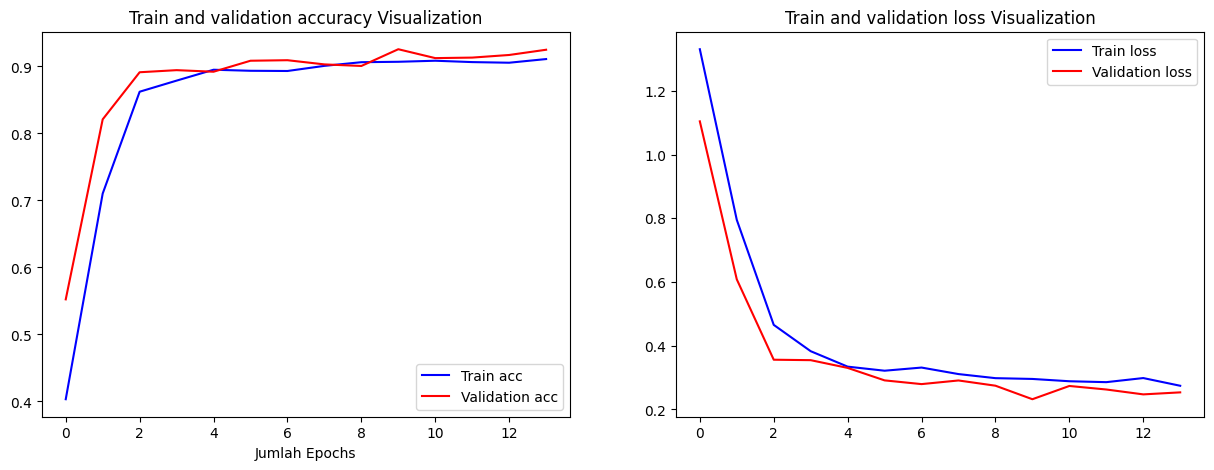

In [46]:
plot_history(history)

In [47]:
import numpy as np
from sklearn.metrics import classification_report

# Generate predictions for the test data
y_pred = model.predict(padded_test)
y_pred = np.argmax(y_pred, axis=1)

# Print the classification report
print(classification_report(label_test, y_pred))


798/798 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
              precision    recall  f1-score   support

           0       0.94      0.89      0.92      6380
           1       0.95      0.98      0.97      6380
           2       0.89      0.88      0.89      6380
           3       0.88      0.91      0.89      6380

    accuracy                           0.92     25520
   macro avg       0.92      0.92      0.92     25520
weighted avg       0.92      0.92      0.92     25520



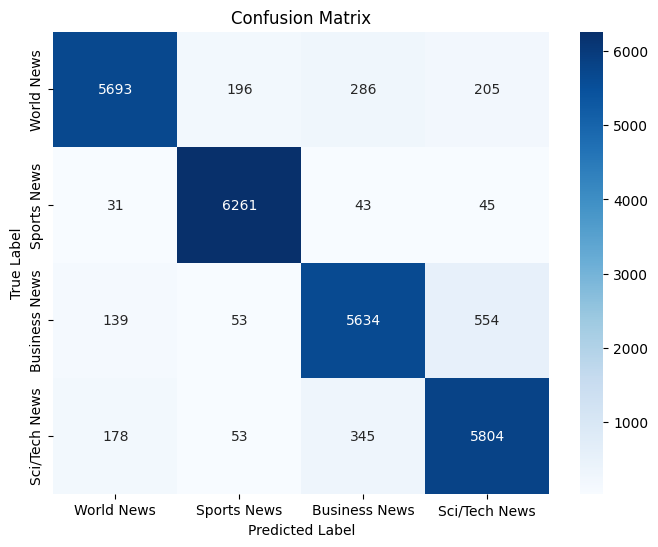

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(label_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['World News', 'Sports News', 'Business News', 'Sci/Tech News'],
            yticklabels=['World News', 'Sports News', 'Business News', 'Sci/Tech News'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [49]:
#Lstm Test
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define multiple new text samples
texts = [
    "Real Madrid has won the champions league title for 2024",
    "NASA has launched a new satellite to study climate change",
    "Stock market hits record high due to economic growth",
    "New tech innovation promises to revolutionize AI capabilities",
    "Local football team wins the national championship",
    "Government announces new policies to tackle unemployment"
]

# Tokenize the texts
seqs = tokenizer.texts_to_sequences(texts)

# Pad the sequences
padded = pad_sequences(seqs, maxlen=100)

# Make predictions
preds = model.predict(padded)

# Define category labels
labels = ['World News', 'Sports News', 'Business News', 'Sci/Tech News']

# Print predictions for each sample
for i, text in enumerate(texts):
    pred = preds[i]
    predicted_label = labels[np.argmax(pred)]
    print(f"Text: {text}")
    print(f"Prediction: {predicted_label} (Probabilities: {pred})\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Text: Real Madrid has won the champions league title for 2024
Prediction: Sports News (Probabilities: [0.06702334 0.87749004 0.02240011 0.03308649])

Text: NASA has launched a new satellite to study climate change
Prediction: Sci/Tech News (Probabilities: [0.01789506 0.00102477 0.02418654 0.9568936 ])

Text: Stock market hits record high due to economic growth
Prediction: Business News (Probabilities: [0.12337541 0.01816234 0.7612956  0.09716674])

Text: New tech innovation promises to revolutionize AI capabilities
Prediction: Sci/Tech News (Probabilities: [0.11237949 0.03770094 0.19747151 0.6524481 ])

Text: Local football team wins the national championship
Prediction: Sports News (Probabilities: [0.11780313 0.8347232  0.0215618  0.02591193])

Text: Government announces new policies to tackle unemployment
Prediction: World News (Probabilities: [0.49533272 0.04857957 0.26477918 0.19130853])



In [50]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=total_words, output_dim=128, input_length=100),
    tf.keras.layers.GRU(128),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy')
model.summary()

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.91 and logs.get('val_accuracy')>0.91):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 91%!")
callbacks = myCallback()

time_array = []
start_time = time.time()

# model fit
history = model.fit(padded_train, label_train,
                    batch_size=256,
                    epochs=30,
                    validation_data=(padded_test, label_test),
                    verbose=2, callbacks=[callbacks],
                    validation_steps=5, steps_per_epoch=25)

print("--- %.2f menit ---" % ((time.time() - start_time)/60))
time_array.append(time.time() - start_time)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
25/25 - 3s - 111ms/step - accuracy: 0.3939 - loss: 1.3470 - val_accuracy: 0.4984 - val_loss: 1.1369
Epoch 2/30
25/25 - 0s - 16ms/step - accuracy: 0.4941 - loss: 1.2462 - val_accuracy: 0.5516 - val_loss: 1.0246
Epoch 3/30
25/25 - 0s - 15ms/step - accuracy: 0.6241 - loss: 0.9115 - val_accuracy: 0.6875 - val_loss: 0.7669
Epoch 4/30
25/25 - 0s - 15ms/step - accuracy: 0.7200 - loss: 0.7046 - val_accuracy: 0.7797 - val_loss: 0.6111
Epoch 5/30
25/25 - 0s - 16ms/step - accuracy: 0.8109 - loss: 0.5376 - val_accuracy: 0.8305 - val_loss: 0.5042
Epoch 6/30
25/25 - 0s - 16ms/step - accuracy: 0.8472 - loss: 0.4515 - val_accuracy: 0.8687 - val_loss: 0.4329
Epoch 7/30
25/25 - 0s - 16ms/step - accuracy: 0.8617 - loss: 0.4208 - val_accuracy: 0.8602 - val_loss: 0.3981
Epoch 8/30
25/25 - 0s - 16ms/step - accuracy: 0.8691 - loss: 0.4052 - val_accuracy: 0.8664 - val_loss: 0.3959
Epoch 9/30
25/25 - 0s - 16ms/step - accuracy: 0.8741 - loss: 0.3927 - val_accuracy: 0.8742 - val_loss: 0.3509
Epoch 10/

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



The accuracy of the training set and the validation set has reached > 91%!
25/25 - 4s - 164ms/step - accuracy: 0.9177 - loss: 0.2570 - val_accuracy: 0.9109 - val_loss: 0.2702
--- 0.22 menit ---


Training Accuracy: 0.92
Training Loss: 0.26
Validation Accuracy: 0.91
Validation Loss: 0.27




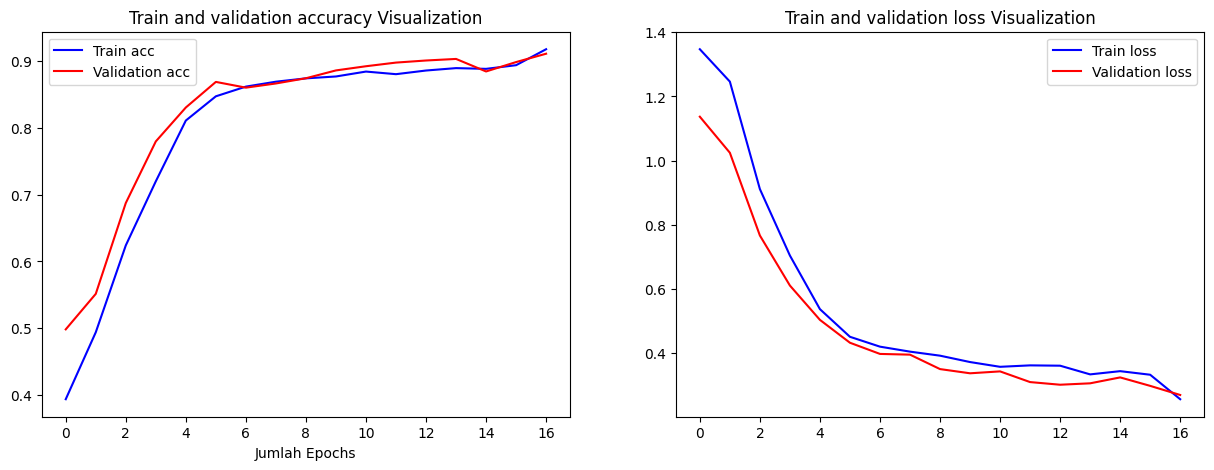

In [51]:
import matplotlib.pyplot as plt
# Plot Visualization Accuracy and Loss Each Epoch
# define function plot visualization training and validation process
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    print("Training Accuracy: %.2f" % acc[-1])
    print("Training Loss: %.2f" % loss[-1])
    print("Validation Accuracy: %.2f" % val_acc[-1])
    print("Validation Loss: %.2f" % val_loss[-1] + '\n\n')

    # make a visualization of the results of the neural network between loss, validation loss and accuracy, validation accuracy
    plt.figure(figsize=(15, 5))

    # create visualizations for accuracy values in the training and validation process
    plt.subplot(1, 2, 1)
    plt.plot(acc, 'b', label='Train acc')
    plt.plot(val_acc, 'r', label='Validation acc')
    plt.title('Train and validation accuracy Visualization')
    plt.xlabel("Jumlah Epochs")
    plt.legend()

    # create visualizations for loss values in the training and validation process
    plt.subplot(1, 2, 2)
    plt.plot(loss, 'b', label='Train loss')
    plt.plot(val_loss, 'r', label='Validation loss')
    plt.title('Train and validation loss Visualization')
    plt.legend()
plot_history(history)


In [52]:
import numpy as np
# Generate predictions for the test data
y_pred = model.predict(padded_test)
y_pred = np.argmax(y_pred, axis=1)

# Print the classification report
print(classification_report(label_test, y_pred))


798/798 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      6380
           1       0.94      0.97      0.95      6380
           2       0.85      0.87      0.86      6380
           3       0.85      0.90      0.87      6380

    accuracy                           0.90     25520
   macro avg       0.90      0.90      0.90     25520
weighted avg       0.90      0.90      0.90     25520



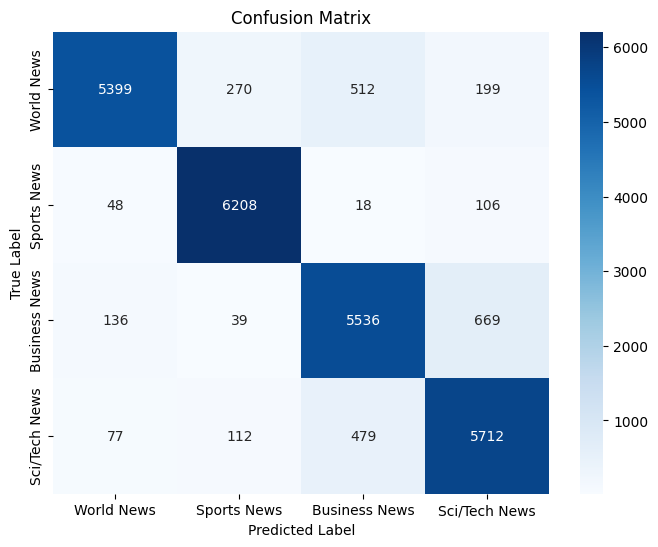

In [53]:
import matplotlib.pyplot as plt
# Generate the confusion matrix
cm = confusion_matrix(label_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['World News', 'Sports News', 'Business News', 'Sci/Tech News'],
            yticklabels=['World News', 'Sports News', 'Business News', 'Sci/Tech News'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [54]:
#Gru test
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define multiple new text samples
texts = [
    "Real Madrid has won the champions league title for 2024",
    "NASA has launched a new satellite to study climate change",
    "Stock market hits record high due to economic growth",
    "New tech innovation promises to revolutionize AI capabilities",
    "Local football team wins the national championship",
    "Government announces new policies to tackle unemployment"
]

# Tokenize the texts
seqs = tokenizer.texts_to_sequences(texts)

# Pad the sequences
padded = pad_sequences(seqs, maxlen=100)

# Make predictions
preds = model.predict(padded)

# Define category labels
labels = ['World News', 'Sports News', 'Business News', 'Sci/Tech News']

# Print predictions for each sample
for i, text in enumerate(texts):
    pred = preds[i]
    predicted_label = labels[np.argmax(pred)]
    print(f"Text: {text}")
    print(f"Prediction: {predicted_label} (Probabilities: {pred})\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Text: Real Madrid has won the champions league title for 2024
Prediction: Sports News (Probabilities: [0.06879503 0.8241858  0.01818363 0.08883552])

Text: NASA has launched a new satellite to study climate change
Prediction: Sci/Tech News (Probabilities: [1.4542443e-03 2.2365709e-04 2.1752547e-02 9.7656947e-01])

Text: Stock market hits record high due to economic growth
Prediction: Business News (Probabilities: [2.6237821e-02 7.3634677e-05 9.5683581e-01 1.6852809e-02])

Text: New tech innovation promises to revolutionize AI capabilities
Prediction: Sci/Tech News (Probabilities: [0.0202585  0.00399951 0.20307505 0.7726669 ])

Text: Local football team wins the national championship
Prediction: Sports News (Probabilities: [0.06865003 0.86484176 0.01557631 0.05093187])

Text: Government announces new policies to tackle unemployment
Prediction: Business News (Probabilities: [0.12051084 0.01032202 0.7210699  0.14809725])



In [55]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=total_words, output_dim=128, input_length=100),
    tf.keras.layers.SimpleRNN(128),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy')
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [56]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.91 and logs.get('val_accuracy')>0.91):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 91%!")
callbacks = myCallback()

time_array = []
start_time = time.time()

# model fit
history = model.fit(padded_train, label_train,
                    batch_size=256,
                    epochs=30,
                    validation_data=(padded_test, label_test),
                    verbose=2, callbacks=[callbacks],
                    validation_steps=5, steps_per_epoch=25)

print("--- %.2f menit ---" % ((time.time() - start_time)/60))
time_array.append(time.time() - start_time)


Epoch 1/30
25/25 - 14s - 559ms/step - accuracy: 0.2728 - loss: 1.3905 - val_accuracy: 0.2789 - val_loss: 1.3803
Epoch 2/30
25/25 - 0s - 17ms/step - accuracy: 0.3605 - loss: 1.3148 - val_accuracy: 0.3938 - val_loss: 1.2500
Epoch 3/30
25/25 - 0s - 15ms/step - accuracy: 0.4898 - loss: 1.0915 - val_accuracy: 0.5719 - val_loss: 1.0520
Epoch 4/30
25/25 - 0s - 15ms/step - accuracy: 0.5586 - loss: 0.9487 - val_accuracy: 0.6203 - val_loss: 0.8376
Epoch 5/30
25/25 - 0s - 15ms/step - accuracy: 0.7083 - loss: 0.7223 - val_accuracy: 0.8172 - val_loss: 0.5153
Epoch 6/30
25/25 - 0s - 15ms/step - accuracy: 0.8578 - loss: 0.4349 - val_accuracy: 0.8719 - val_loss: 0.3829
Epoch 7/30
25/25 - 0s - 15ms/step - accuracy: 0.8614 - loss: 0.4238 - val_accuracy: 0.8766 - val_loss: 0.3591
Epoch 8/30
25/25 - 0s - 15ms/step - accuracy: 0.8656 - loss: 0.4088 - val_accuracy: 0.8781 - val_loss: 0.3824
Epoch 9/30
25/25 - 0s - 15ms/step - accuracy: 0.8838 - loss: 0.3720 - val_accuracy: 0.8938 - val_loss: 0.3492
Epoch 10

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


25/25 - 1s - 50ms/step - accuracy: 0.9116 - loss: 0.2701 - val_accuracy: 0.9078 - val_loss: 0.2973
Epoch 18/30

The accuracy of the training set and the validation set has reached > 91%!
25/25 - 0s - 15ms/step - accuracy: 0.9205 - loss: 0.2465 - val_accuracy: 0.9141 - val_loss: 0.2761
--- 0.61 menit ---


Training Accuracy: 0.92
Training Loss: 0.25
Validation Accuracy: 0.91
Validation Loss: 0.28




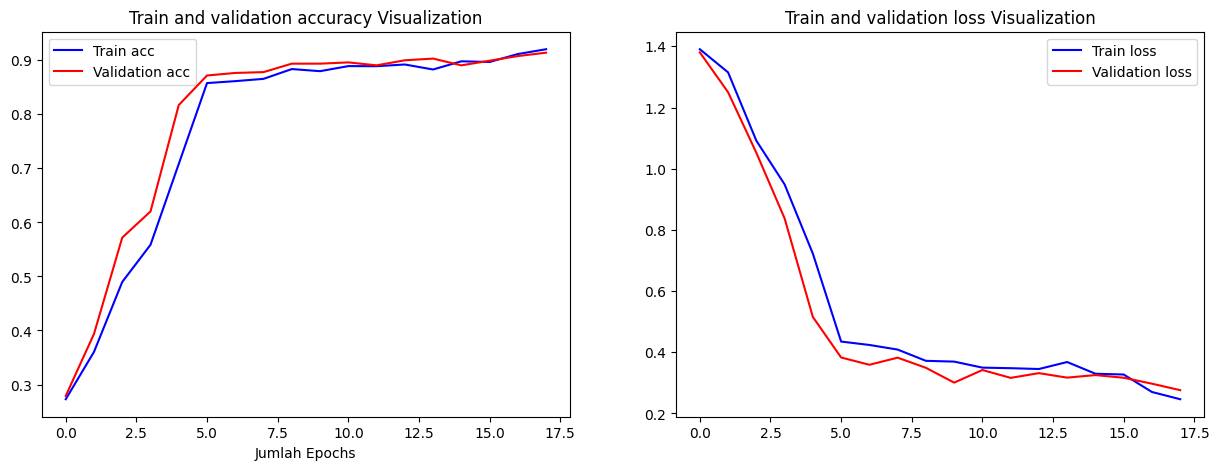

In [57]:
import matplotlib.pyplot as plt
# Plot Visualization Accuracy and Loss Each Epoch
# define function plot visualization training and validation process
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    print("Training Accuracy: %.2f" % acc[-1])
    print("Training Loss: %.2f" % loss[-1])
    print("Validation Accuracy: %.2f" % val_acc[-1])
    print("Validation Loss: %.2f" % val_loss[-1] + '\n\n')

    # make a visualization of the results of the neural network between loss, validation loss and accuracy, validation accuracy
    plt.figure(figsize=(15, 5))

    # create visualizations for accuracy values in the training and validation process
    plt.subplot(1, 2, 1)
    plt.plot(acc, 'b', label='Train acc')
    plt.plot(val_acc, 'r', label='Validation acc')
    plt.title('Train and validation accuracy Visualization')
    plt.xlabel("Jumlah Epochs")
    plt.legend()

    # create visualizations for loss values in the training and validation process
    plt.subplot(1, 2, 2)
    plt.plot(loss, 'b', label='Train loss')
    plt.plot(val_loss, 'r', label='Validation loss')
    plt.title('Train and validation loss Visualization')
    plt.legend()
plot_history(history)


In [58]:
import numpy as np
# Generate predictions for the test data
y_pred = model.predict(padded_test)
y_pred = np.argmax(y_pred, axis=1)

# Print the classification report
print(classification_report(label_test, y_pred))


798/798 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      6380
           1       0.96      0.96      0.96      6380
           2       0.84      0.90      0.87      6380
           3       0.90      0.85      0.87      6380

    accuracy                           0.90     25520
   macro avg       0.90      0.90      0.90     25520
weighted avg       0.90      0.90      0.90     25520



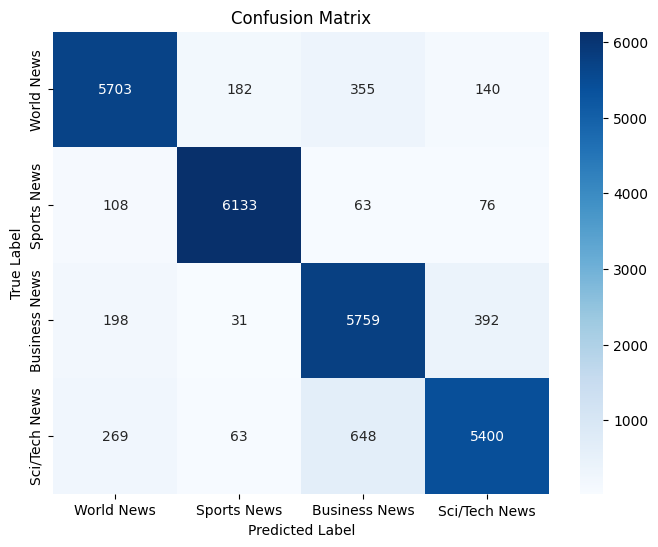

In [59]:
import matplotlib.pyplot as plt
# Generate the confusion matrix
cm = confusion_matrix(label_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['World News', 'Sports News', 'Business News', 'Sci/Tech News'],
            yticklabels=['World News', 'Sports News', 'Business News', 'Sci/Tech News'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [60]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define multiple new text samples
texts = [
    "Real Madrid has won the champions league title for 2024",
    "NASA has launched a new satellite to study climate change",
    "Stock market hits record high due to economic growth",
    "New tech innovation promises to revolutionize AI capabilities",
    "Local football team wins the national championship",
    "Government announces new policies to tackle unemployment"
]

# Tokenize the texts
seqs = tokenizer.texts_to_sequences(texts)

# Pad the sequences
padded = pad_sequences(seqs, maxlen=100)

# Make predictions
preds = model.predict(padded)

# Define category labels
labels = ['World News', 'Sports News', 'Business News', 'Sci/Tech News']

# Print predictions for each sample
for i, text in enumerate(texts):
    pred = preds[i]
    predicted_label = labels[np.argmax(pred)]
    print(f"Text: {text}")
    print(f"Prediction: {predicted_label} (Probabilities: {pred})\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step
Text: Real Madrid has won the champions league title for 2024
Prediction: Sports News (Probabilities: [0.05564537 0.8582942  0.02777763 0.05828282])

Text: NASA has launched a new satellite to study climate change
Prediction: Sci/Tech News (Probabilities: [0.02171595 0.00332124 0.0849672  0.8899957 ])

Text: Stock market hits record high due to economic growth
Prediction: Business News (Probabilities: [0.04838081 0.00161428 0.8764989  0.07350595])

Text: New tech innovation promises to revolutionize AI capabilities
Prediction: Sci/Tech News (Probabilities: [0.05611017 0.05685307 0.19292322 0.6941135 ])

Text: Local football team wins the national championship
Prediction: Sports News (Probabilities: [4.4872197e-03 9.9439234e-01 2.7576130e-04 8.4472570e-04])

Text: Government announces new policies to tackle unemployment
Prediction: Sci/Tech News (Probabilities: [0.13120249 0.07788336 0.2567167  0.53419745])

